<a href="https://colab.research.google.com/github/Joao-Victor-AVM/ProbValorant/blob/main/ValorantProb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Valorant - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
|  |                                    | |                                                                                                                                             |
| name   | Name                              | Númerico                      | Nome dos agentes númerico de 0 até 19, em ordem alfabética                                                                |
| game_type      | Game Type                                       | Númerico                                              | tipos de jogo de 0 até 6, em ordem alfabética                                                                                                                                    |
| map      | Map                              |Númerico                                              | mapas são númerados de 0 até 8                                                        |
| game_rank    | Game Rank| Númerico                                          | Rank númerado de 0 até 25 (Unrated - Radiante), em ordem afabética                       |
|    ||                                                |  |
|    |                              |                                                |                                                                                                                                             |
|      |                              |                                                |                                                                                                                                             |
|     |                               |                                                |                                                                                                                                             |
|  |                         |  |                                                                                                                                             |

##**O que é Valorant?**

Valorant é um jogo de tiro em primeira pessoa tático de 5x5 que se utiliza de personagens (agentes). É uma melhor de 25 (vence quem vencer 13 rodadas). Para se vencer uma rodada, a equipe atacante deve plantar a bomba e esperar que ela exploda; a equipe defensora deve impedir que a bomba seja plantada ou desarmar a bomba antes que exploda. A cada 12 rounds as posições são trocadas (atacantes viram defensores e vice-versa). Cada jogador só tem uma vida por round. Para se eliminar inimigos são utilizadas as armas que podem se compradas a cada começo de round.

Diferente de outros jogos, Valorant não possui granadas ou ferramentas. Essa tarefa fica a cargo dos agentes, personagens selecionáveis antes da partida começar. Cada agente possui 4 habilidades: uma padrão(não precisa ser comprada), duas que tem que ser compradas na loja junto com as armas e a ultimate que carrega conforme o desempenho da partida e a cada round. Cada agente tem um conjunto de habilidades únicos que funcionam melhor em diferentes mapas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
from numpy.random import seed, randint
from numpy import mean
from matplotlib import pyplot as plt

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
valorant = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/agents_abilities_stat.csv')

In [ ]:
valorant.head() #exemplo dataset original

,Rank,Name,Game Type,Map,Game Rank,1st Ability,2nd Ability,3rd Ability,Ultimate,Matches
0,1,Breach,replication,fracture,NaN,8.5,6.3,4.0,0.9,20
1,2,Chamber,replication,fracture,NaN,3.2,6.8,6.0,1.8,5
2,3,Sage,replication,fracture,NaN,2.0,1.1,2.1,0.1,30
3,4,Raze,replication,fracture,NaN,8.5,6.4,6.1,1.1,65
4,5,Killjoy,replication,fracture,NaN,4.7,3.8,9.2,1.2,60


In [ ]:
valorant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         5413 non-null   int64  
 1   Name         5413 non-null   object 
 2   Game Type    5413 non-null   object 
 3   Map          5413 non-null   object 
 4   Game Rank    4155 non-null   object 
 5   1st Ability  5413 non-null   float64
 6   2nd Ability  5413 non-null   float64
 7   3rd Ability  5413 non-null   float64
 8   Ultimate     5413 non-null   float64
 9   Matches      5413 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 423.0+ KB


In [ ]:
valorant.drop(['Matches', '1st Ability', '2nd Ability', '3rd Ability', 'Ultimate', 'Rank'], axis=1, inplace=True)#Removendo Colunas Desnecessárias

In [ ]:
valorant.fillna("Unrated", inplace=True)#Preenchendo Nulos

In [ ]:
#Apagando linhas com all e overall
i = 47
while i<=65:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 198
while i<=217:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 378
while i<=397:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 458
while i<=657:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 778
while i<=797:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 978
while i<=997:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1178
while i<=1197:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1358
while i<=1377:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1518
while i<=1537:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1678
while i<=1697:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1838
while i<=1857:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 1978
while i<=1997:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2138
while i<=2157:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2298
while i<=2317:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2458
while i<=2477:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2618
while i<=2637:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2778
while i<=2797:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 2938
while i<=2957:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3098
while i<=3117:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3258
while i<=3277:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3418
while i<=3437:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3578
while i<=3597:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3738
while i<=3757:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 3898
while i<=3917:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4058
while i<=4077:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4218
while i<=4237:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4378
while i<=4397:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4518
while i<=4537:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4678
while i<=4697:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4838
while i<=4857:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 4998
while i<=5017:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 5158
while i<=5177:
  valorant.drop(index = i, inplace = True)
  i = i + 1

i = 5314
while i<=5333:
  valorant.drop(index = i, inplace = True)
  i = i + 1

In [ ]:
valorant.head()#Dataset após Tratamento de Dados

,Name,Game Type,Map,Game Rank
0,Breach,replication,fracture,Unrated
1,Chamber,replication,fracture,Unrated
2,Sage,replication,fracture,Unrated
3,Raze,replication,fracture,Unrated
4,Killjoy,replication,fracture,Unrated


In [ ]:
le = preprocessing.LabelEncoder()
valorant['Game Type'] = le.fit_transform(valorant['Game Type'])

In [ ]:
le = preprocessing.LabelEncoder()
valorant['Name'] = le.fit_transform(valorant['Name'])

In [ ]:
le = preprocessing.LabelEncoder()
valorant['Map'] = le.fit_transform(valorant['Map'])

In [ ]:
le = preprocessing.LabelEncoder()
valorant['Game Rank'] = le.fit_transform(valorant['Game Rank'])

In [ ]:
valorant.head() #Após numerização das colunas

,Name,Game Type,Map,Game Rank
0,1,3,3,25
1,3,3,3,25
2,15,3,3,25
3,13,3,3,25
4,9,3,3,25


In [ ]:
valorant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 5412
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Name       4574 non-null   int64
 1   Game Type  4574 non-null   int64
 2   Map        4574 non-null   int64
 3   Game Rank  4574 non-null   int64
dtypes: int64(4)
memory usage: 178.7 KB


##**Probabilidade Simples**

Aqui será testado o quanto um agente pode ser popular em qualquer modo de jogo, ranking ou mapa. Para isso será testado a probabilidade do agente ser retirado na amostra e ser comparado com os demais. A maior probabilidade significa que o agente se repete mais vezes, consequentemente mais popular.

In [ ]:
probBrim = round(len(valorant[valorant['Name'] == 2])/ len(valorant), 4)
print("A probabilidade de ser um Brimstone é de: " + str(probBrim*100) + "%")

probViper = round(len(valorant[valorant['Name'] == 18])/ len(valorant), 4)
print("A probabilidade de ser uma Viper é de: " + str(probViper*100) + "%")

probSage = round(len(valorant[valorant['Name'] == 15])/ len(valorant), 4)
print("A probabilidade de ser uma Sage é de: " + str(probSage*100) + "%")

probOmen = round(len(valorant[valorant['Name'] == 11])/ len(valorant), 4)
print("A probabilidade de ser um Omen é de: " + str(probOmen*100) + "%")

probFN = round(len(valorant[valorant['Name'] == 12])/ len(valorant), 4)
print("A probabilidade de ser um Phoenix é de: " + str(probFN*100) + "%")

probSova = round(len(valorant[valorant['Name'] == 17])/ len(valorant), 4)
print("A probabilidade de ser um Sova é de: " + str(probSova*100) + "%")

probCY = round(len(valorant[valorant['Name'] == 4])/ len(valorant), 4)
print("A probabilidade de ser um Cypher é de: " + str(probCY*100) + "%")

probBreach = round(len(valorant[valorant['Name'] == 1])/ len(valorant), 4)
print("A probabilidade de ser um Breach é de: " + str(probBreach*100) + "%")

probJett = round(len(valorant[valorant['Name'] == 7])/ len(valorant), 4)
print("A probabilidade de ser uma Jett é de: " + str(probJett*100) + "%")

probRaze = round(len(valorant[valorant['Name'] == 13])/ len(valorant), 4)
print("A probabilidade de ser uma Raze é de: " + str(probRaze*100) + "%")

probRey = round(len(valorant[valorant['Name'] == 14])/ len(valorant), 4)
print("A probabilidade de ser uma Reyna é de: " + str(probRey*100) + "%")

probKJ = round(len(valorant[valorant['Name'] == 9])/ len(valorant), 4)
print("A probabilidade de ser uma Killjoy é de: " + str(probKJ*100) + "%")

probSkye = round(len(valorant[valorant['Name'] == 16])/ len(valorant), 4)
print("A probabilidade de ser uma Skye é de: " + str(probSkye*100) + "%")

probYoru = round(len(valorant[valorant['Name'] == 19])/ len(valorant), 4)
print("A probabilidade de ser um Yoru é de: " + str(probYoru*100) + "%")

probAS = round(len(valorant[valorant['Name'] == 0])/ len(valorant), 4)
print("A probabilidade de ser uma Astra é de: " + str(probAS*100) + "%")

probKO = round(len(valorant[valorant['Name'] == 8])/ len(valorant), 4)
print("A probabilidade de ser um KAY/O é de: " + str(probKO*100) + "%")

probCha = round(len(valorant[valorant['Name'] == 3])/ len(valorant), 4)
print("A probabilidade de ser um Chamber é de: " + str(probCha*100) + "%")

probNeon = round(len(valorant[valorant['Name'] == 10])/ len(valorant), 4)
print("A probabilidade de ser uma Neon é de: " + str(probNeon*100) + "%")

probFade = round(len(valorant[valorant['Name'] == 5])/ len(valorant), 4)
print("A probabilidade de ser uma Fade é de: " + str(probFade*100) + "%")

probHar = round(len(valorant[valorant['Name'] == 6])/ len(valorant), 4)
print("A probabilidade de ser um Harbor é de: " + str(probHar*100) + "%")

A probabilidade de ser um Brimstone é de: 4.9799999999999995%
A probabilidade de ser uma Viper é de: 4.9399999999999995%
A probabilidade de ser uma Sage é de: 5.07%
A probabilidade de ser um Omen é de: 4.96%
A probabilidade de ser um Phoenix é de: 5.01%
A probabilidade de ser um Sova é de: 4.96%
A probabilidade de ser um Cypher é de: 4.9799999999999995%
A probabilidade de ser um Breach é de: 5.029999999999999%
A probabilidade de ser uma Jett é de: 5.050000000000001%
A probabilidade de ser uma Raze é de: 5.09%
A probabilidade de ser uma Reyna é de: 5.07%
A probabilidade de ser uma Killjoy é de: 4.96%
A probabilidade de ser uma Skye é de: 4.92%
A probabilidade de ser um Yoru é de: 5.029999999999999%
A probabilidade de ser uma Astra é de: 4.96%
A probabilidade de ser um KAY/O é de: 4.9799999999999995%
A probabilidade de ser um Chamber é de: 4.9799999999999995%
A probabilidade de ser uma Neon é de: 5.09%
A probabilidade de ser uma Fade é de: 4.9399999999999995%
A probabilidade de ser um Ha

Aqui, é possivél conferir que as agentes mais prováveis de serem populares são Neon e Raze.



##**Probabilidade da União**

Aqui será testado qual a probabilidade de ser um modo de jogo padrão. Em Valorant ha uma crescente de modos de jogos diferenciados, mas os modos padrões são: competitive e unrated. Com isso, pode-se verificar a relevancia dos modos especiais em relação aos modos padrões, ao mesmo tempo que verificar a complexidade dos modos padrões. Quanto maior a probabilidade de se achar um jogo padrão, maior a irrelevânia dos demais modos.

In [ ]:
Patern = len(valorant[(valorant["Game Type"] == 0) | (valorant['Game Type'] == 6)])
probPat = round(Patern/len(valorant), 4)
print("A probabilidade de se achar um modo de jogo Competitive ou Unreated é de: " + str(probPat*100) + '%')

A probabilidade de se achar um modo de jogo Competitive ou Unreated é de: 82.53%


Aqui há a confirmação do quão complexo o modo padrão pode ser em comparação aos demais, principalmente pelo fato do dataset ser estruturado com muitos modos competitive devido a coluna Game Rank deste modo.

##**Probabilidade da Intersecção**




Aqui será testado qual a probabilidade de um determinado agente ser achado no modo de jogo competitivo. Achando um agente muitas vezes no competitivo, significa que ele deve ser um dos melhores agente para o competitivo, consequentemente, do jogo.

In [ ]:
probBrimComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 2)])/len(valorant), 4)
print("A probabilidade de um Brimstone aparecer no competitivo é de: " + str(probBrimComp*100))

probViperComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 18)])/len(valorant), 4)
print("A probabilidade de uma Viper aparecer no competitivo é de: " + str(probViperComp*100))

probSageComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 15)])/len(valorant), 4)
print("A probabilidade de uma Sage aparecer no competitivo é de: " + str(probSageComp*100))

probOmenComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 11)])/len(valorant), 4)
print("A probabilidade de um Omen aparecer no competitivo é de: " + str(probOmenComp*100))

probFNComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 12)])/len(valorant), 4)
print("A probabilidade de um Phoenix aparecer no competitivo é de: " + str(probFNComp*100))

probSovaComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 17)])/len(valorant), 4)
print("A probabilidade de um Sova aparecer no competitivo é de: " + str(probSovaComp*100))

probCYComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 4)])/len(valorant), 4)
print("A probabilidade de um Cypher aparecer no competitivo é de: " + str(probCYComp*100))

probBreachComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 1)])/len(valorant), 4)
print("A probabilidade de um Breach aparecer no competitivo é de: " + str(probBreachComp*100))

probJettComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 7)])/len(valorant), 4)
print("A probabilidade de uma Jett aparecer no competitivo é de: " + str(probJettComp*100))

probRazeComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 13)])/len(valorant), 4)
print("A probabilidade de uma Raze aparecer no competitivo é de: " + str(probRazeComp*100))

probReyComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 14)])/len(valorant), 4)
print("A probabilidade de uma Reyna aparecer no competitivo é de: " + str(probReyComp*100))

probKJComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 9)])/len(valorant), 4)
print("A probabilidade de uma Killjoy aparecer no competitivo é de: " + str(probKJComp*100))

probSkyeComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 16)])/len(valorant), 4)
print("A probabilidade de uma Skye aparecer no competitivo é de: " + str(probSkyeComp*100))

probYoruComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 19)])/len(valorant), 4)
print("A probabilidade de um Yoru aparecer no competitivo é de: " + str(probYoruComp*100))

probASComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 0)])/len(valorant), 4)
print("A probabilidade de uma Astra aparecer no competitivo é de: " + str(probASComp*100))

probKOComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 8)])/len(valorant), 4)
print("A probabilidade de um KAY/O aparecer no competitivo é de: " + str(probKOComp*100))

probChaComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 3)])/len(valorant), 4)
print("A probabilidade de um Chamber aparecer no competitivo é de: " + str(probChaComp*100))

probNeonComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 10)])/len(valorant), 4)
print("A probabilidade de uma Neon aparecer no competitivo é de: " + str(probNeonComp*100))

probFadeComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 5)])/len(valorant), 4)
print("A probabilidade de uma Fade aparecer no competitivo é de: " + str(probFadeComp*100))

probHarComp = round(len(valorant[(valorant['Game Type'] == 0) & (valorant['Name'] == 6)])/len(valorant), 4)
print("A probabilidade de uma Harbor aparecer no competitivo é de: " + str(probHarComp*100))

A probabilidade de um Brimstone aparecer no competitivo é de: 3.9600000000000004
A probabilidade de uma Viper aparecer no competitivo é de: 3.9600000000000004
A probabilidade de uma Sage aparecer no competitivo é de: 3.9800000000000004
A probabilidade de um Omen aparecer no competitivo é de: 3.9800000000000004
A probabilidade de um Phoenix aparecer no competitivo é de: 3.9800000000000004
A probabilidade de um Sova aparecer no competitivo é de: 3.9800000000000004
A probabilidade de um Cypher aparecer no competitivo é de: 3.9800000000000004
A probabilidade de um Breach aparecer no competitivo é de: 3.9600000000000004
A probabilidade de uma Jett aparecer no competitivo é de: 3.9800000000000004
A probabilidade de uma Raze aparecer no competitivo é de: 3.9800000000000004
A probabilidade de uma Reyna aparecer no competitivo é de: 3.9800000000000004
A probabilidade de uma Killjoy aparecer no competitivo é de: 3.9800000000000004
A probabilidade de uma Skye aparecer no competitivo é de: 3.98000

Como pode-se notar, a maioria esmagadora dos agentes são utilizados com frequencia nas filas competitivas. Os agentes Brimstone, Viper, Breach, Astra e Fade, são poucos escolhidos em relação a maioria, isso provávelmente ocorre por alguns deles, como Astra, serem considerados dificeis de se jogar, ou, uma outra possibilidade, seria que esse agentes são considerados mais táticos que a maioria.

##**Probabilidade do Complemento**

Aqui será testado qual a probabilidade de ser determinado agente e não ser da fila competitiva. A ideia é saber o quanto um agente é popular fora das estratégias competitivas. O quanto ele provavelmente é popular, ou divertido de jogar.

In [ ]:
Pop = len(valorant[(valorant["Game Type"] != 0)])
probPop = round(Pop/len(valorant), 4)

probBrimP = probPop - probBrim
print("A probabilidade de ser um Brimstone fora da fila competitiva é de: " + str(probBrimP*100) + "%")

probViperP = probPop - probViper
print("A probabilidade de ser uma Viper fora da fila competitiva é de: " + str(probViperP*100) + "%")

probSageP = probPop - probSage
print("A probabilidade de ser uma Sage fora da fila competitiva é de: " + str(probSageP*100) + "%")

probOmenP = probPop - probOmen
print("A probabilidade de ser um Omen fora da fila competitiva é de: " + str(probOmenP*100) + "%")

probFNP = probPop - probFN
print("A probabilidade de ser um Phoenix fora da fila competitiva é de: " + str(probFNP*100) + "%")

probSovaP = probPop - probSova
print("A probabilidade de ser um Sova fora da fila competitiva é de: " + str(probSovaP*100) + "%")

probCYP = probPop - probCY
print("A probabilidade de ser um Cypher fora da fila competitiva é de: " + str(probCYP*100) + "%")

probBreachP = probPop - probBreach
print("A probabilidade de ser um Breach fora da fila competitiva é de: " + str(probBreachP*100) + "%")

probJettP = probPop - probJett
print("A probabilidade de ser uma Jett fora da fila competitiva é de: " + str(probJettP*100) + "%")

probRazeP = probPop - probRaze
print("A probabilidade de ser uma Raze fora da fila competitiva é de: " + str(probRazeP*100) + "%")

probReyP = probPop - probRey
print("A probabilidade de ser uma Reyna fora da fila competitiva é de: " + str(probReyP*100) + "%")

probKJP = probPop - probKJ
print("A probabilidade de ser uma Killjoy fora da fila competitiva é de: " + str(probKJP*100) + "%")

probSkyeP = probPop - probSkye
print("A probabilidade de ser uma Skye fora da fila competitiva é de: " + str(probSkyeP*100) + "%")

probYoruP = probPop - probYoru
print("A probabilidade de ser um Yoru fora da fila competitiva é de: " + str(probYoruP*100) + "%")

probASP = probPop - probAS
print("A probabilidade de ser uma Astra fora da fila competitiva é de: " + str(probASP*100) + "%")

probKOP = probPop - probKO
print("A probabilidade de ser um KAY/O fora da fila competitiva é de: " + str(probKOP*100) + "%")

probChaP = probPop - probCha
print("A probabilidade de ser um Chamber fora da fila competitiva é de: " + str(probChaP*100) + "%")

probNeonP = probPop - probNeon
print("A probabilidade de ser uma Neon fora da fila competitiva é de: " + str(probNeonP*100) + "%")

probFadeP = probPop - probFade
print("A probabilidade de ser uma Fade fora da fila competitiva é de: " + str(probFadeP*100) + "%")

probHarP = probPop - probHar
print("A probabilidade de ser um Harbor fora da fila competitiva é de: " + str(probHarP*100) + "%")

A probabilidade de ser um Brimstone fora da fila competitiva é de: 15.550000000000002%
A probabilidade de ser uma Viper fora da fila competitiva é de: 15.590000000000002%
A probabilidade de ser uma Sage fora da fila competitiva é de: 15.46%
A probabilidade de ser um Omen fora da fila competitiva é de: 15.57%
A probabilidade de ser um Phoenix fora da fila competitiva é de: 15.52%
A probabilidade de ser um Sova fora da fila competitiva é de: 15.57%
A probabilidade de ser um Cypher fora da fila competitiva é de: 15.550000000000002%
A probabilidade de ser um Breach fora da fila competitiva é de: 15.500000000000004%
A probabilidade de ser uma Jett fora da fila competitiva é de: 15.479999999999999%
A probabilidade de ser uma Raze fora da fila competitiva é de: 15.440000000000001%
A probabilidade de ser uma Reyna fora da fila competitiva é de: 15.46%
A probabilidade de ser uma Killjoy fora da fila competitiva é de: 15.57%
A probabilidade de ser uma Skye fora da fila competitiva é de: 15.61000

Com os dados acima, é possivel conferir que o agente que mais aparece fora da fila competitiva é a Skye.

##**Probabilidade da Diferença**

Aqui será testado qual a probabilidade do modo de jogo ser competitivo e o rank não ser unrated. Para se ter um rank em Valorant, primeiro é preciso jogar 5 partidas para determinar o rank base, para assim subir de ranks. Quando não se joga partidas para classificação suficiente, se esta em unrated, não há uma classificação. Definindo a probabilidade de não ser unrated, só evidencia o quanto isto é pequeno no contexto geral de ranks.

In [ ]:
compNunrated = len(valorant[(valorant["Game Type"] == 0) & (valorant["Game Rank"] != 25)])
probCompNunrated = round(compNunrated/len(valorant), 4)

print("A probabilidade de se achar um rank que não seja unrated na fila competitivo é de: " + str(probCompNunrated*100) + "%")

A probabilidade de se achar um rank que não seja unrated na fila competitivo é de: 76.41%


##**Probabilidade Condicional**

Aqui será testado a popularidade de cada agente nos difentes mapas. A agente que mais aparecer no mesmo mapa, poderia ser de um uso obrigátorio para aquele mapa.

**Bind = 1**

In [ ]:
probBind = round(len(valorant[valorant['Map'] == 1])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimBind = probCBrim/probBind
print("A probabilidade de ser um Brimstone na Bind é de: " + str(probBrimBind*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperBind = probCViper/probBind
print("A probabilidade de ser uma Viper na Bind é de: " + str(probViperBind*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageBind = probCSage/probBind
print("A probabilidade de ser uma Sage na Bind é de: " + str(probSageBind*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenBind = probCOmen/probBind
print("A probabilidade de ser um Omen na Bind é de: " + str(probOmenBind*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNBind = probCFN/probBind
print("A probabilidade de ser um Phoenix na Bind é de: " + str(probFNBind*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaBind = probCSova/probBind
print("A probabilidade de ser um Sova na Bind é de: " + str(probSovaBind*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYBind = probCCY/probBind
print("A probabilidade de ser um Cypher na Bind é de: " + str(probCYBind*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachBind = probCBreach/probBind
print("A probabilidade de ser um Breach na Bind é de: " + str(probBreachBind*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettBind = probCJett/probBind
print("A probabilidade de ser uma Jett na Bind é de: " + str(probJettBind*100) + "%")

probCRaze= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeBind = probCRaze/probBind
print("A probabilidade de ser uma Raze na Bind é de: " + str(probRazeBind*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyBind = probCRey/probBind
print("A probabilidade de ser uma Reyna na Bind é de: " + str(probReyBind*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJBind = probCKJ/probBind
print("A probabilidade de ser uma Killjoy na Bind é de: " + str(probKJBind*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeBind = probCSkye/probBind
print("A probabilidade de ser uma Skye na Bind é de: " + str(probSkyeBind*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruBind = probCYoru/probBind
print("A probabilidade de ser um Yoru na Bind é de: " + str(probYoruBind*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 0)])/len(valorant), 4)

probASBind = probCAS/probBind
print("A probabilidade de ser uma Astra na Bind é de: " + str(probASBind*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOBind = probCKO/probBind
print("A probabilidade de ser um KAY/O na Bind é de: " + str(probKOBind*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaBind = probCCha/probBind
print("A probabilidade de ser um Chamber na Bind é de: " + str(probChaBind*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonBind = probCNeon/probBind
print("A probabilidade de ser uma Neon na Bind é de: " + str(probNeonBind*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeBind = probCFade/probBind
print("A probabilidade de ser uma Fade na Bind é de: " + str(probFadeBind*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 1) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarBind = probCHar/probBind
print("A probabilidade de ser um Harbor na Bind é de: " + str(probHarBind*100) + "%")

A probabilidade de ser um Brimstone na Bind é de: 5.729166666666668%
A probabilidade de ser uma Viper na Bind é de: 4.6875%
A probabilidade de ser uma Sage na Bind é de: 5.729166666666668%
A probabilidade de ser um Omen na Bind é de: 4.6875%
A probabilidade de ser um Phoenix na Bind é de: 5.729166666666668%
A probabilidade de ser um Sova na Bind é de: 4.6875%
A probabilidade de ser um Cypher na Bind é de: 4.6875%
A probabilidade de ser um Breach na Bind é de: 5.729166666666668%
A probabilidade de ser uma Jett na Bind é de: 5.729166666666668%
A probabilidade de ser uma Raze na Bind é de: 5.729166666666668%
A probabilidade de ser uma Reyna na Bind é de: 4.6875%
A probabilidade de ser uma Killjoy na Bind é de: 5.729166666666668%
A probabilidade de ser uma Skye na Bind é de: 4.6875%
A probabilidade de ser um Yoru na Bind é de: 4.6875%
A probabilidade de ser uma Astra na Bind é de: 4.6875%
A probabilidade de ser um KAY/O na Bind é de: 4.6875%
A probabilidade de ser um Chamber na Bind é de: 

Pode-se notar que os agentes mais escolhida na Bind são Brimstone, Sage, Phoenix, Breach, Raze, Killjoy e Neon. Como visto na Probabilidade Simples, Neon e Raze são as que tem mais probabilidades de aparecerem, aqui não é diferente. No entanto, deve-se levar em consideração que essa amostra esta analisando todas as ocorrencias no dataset, incluindo modos de jogo que não necessariamente se utilizam de estrategias complexas como no competitivo. Dito isso, é muito provável que Neon e Raze estejam aparacendo por conta desses modos.

Em relação aos demais, um ponto de concordância dessas estatisticas são os agentes: Brimstone, Breach, Sage e Killjoy. Esses tres agentes são de senso comum em serem utilizados na Bind não só por suas habilidades serem versáteis e extremamente eficiente em determinadas posições, como também, no caso do Brimstone, se encaixam quase que perfeitamente no mapa.

**Haven = 4**

In [ ]:
probHaven = round(len(valorant[valorant['Map'] == 4])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimHaven = probCBrim/probHaven
print("A probabilidade de ser um Brimstone na Haven é de: " + str(probBrimHaven*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperHaven = probCViper/probHaven
print("A probabilidade de ser uma Viper na Haven é de: " + str(probViperHaven*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageHaven = probCSage/probHaven
print("A probabilidade de ser uma Sage na Haven é de: " + str(probSageHaven*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenHaven = probCOmen/probHaven
print("A probabilidade de ser um Omen na Haven é de: " + str(probOmenHaven*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNHaven = probCFN/probHaven
print("A probabilidade de ser um Phoenix na Haven é de: " + str(probFNHaven*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaHaven = probCSova/probHaven
print("A probabilidade de ser um Sova na Haven é de: " + str(probSovaHaven*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYHaven = probCCY/probHaven
print("A probabilidade de ser um Cypher na Haven é de: " + str(probCYHaven*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachHaven = probCBreach/probHaven
print("A probabilidade de ser um Breach na Haven é de: " + str(probBreachHaven*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettHaven = probCJett/probHaven
print("A probabilidade de ser uma Jett na Haven é de: " + str(probJettHaven*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeHaven = probCRaze/probHaven
print("A probabilidade de ser uma Raze na Haven é de: " + str(probRazeHaven*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyHaven = probCRey/probHaven
print("A probabilidade de ser uma Reyna na Haven é de: " + str(probReyHaven*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJHaven = probCKJ/probHaven
print("A probabilidade de ser uma Killjoy na Haven é de: " + str(probKJHaven*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeHaven = probCSkye/probHaven
print("A probabilidade de ser uma Skye na Haven é de: " + str(probSkyeHaven*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruHaven = probCYoru/probHaven
print("A probabilidade de ser um Yoru na Haven é de: " + str(probYoruHaven*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 0)])/len(valorant), 4)

probASHaven = probCAS/probHaven
print("A probabilidade de ser uma Astra na Haven é de: " + str(probASHaven*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOHaven = probCKO/probHaven
print("A probabilidade de ser um KAY/O na Haven é de: " + str(probKOHaven*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaHaven = probCCha/probHaven
print("A probabilidade de ser um Chamber na Haven é de: " + str(probChaHaven*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonHaven = probCNeon/probHaven
print("A probabilidade de ser uma Neon na Haven é de: " + str(probNeonHaven*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeHaven = probCFade/probHaven
print("A probabilidade de ser uma Fade na Haven é de: " + str(probFadeHaven*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 4) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarHaven = probCHar/probHaven
print("A probabilidade de ser um Harbor na Haven é de: " + str(probHarHaven*100) + "%")

A probabilidade de ser um Brimstone na Haven é de: 5.065123010130247%
A probabilidade de ser uma Viper na Haven é de: 4.92040520984081%
A probabilidade de ser uma Sage na Haven é de: 4.92040520984081%
A probabilidade de ser um Omen na Haven é de: 5.065123010130247%
A probabilidade de ser um Phoenix na Haven é de: 5.065123010130247%
A probabilidade de ser um Sova na Haven é de: 4.92040520984081%
A probabilidade de ser um Cypher na Haven é de: 5.065123010130247%
A probabilidade de ser um Breach na Haven é de: 5.065123010130247%
A probabilidade de ser uma Jett na Haven é de: 5.065123010130247%
A probabilidade de ser uma Raze na Haven é de: 5.065123010130247%
A probabilidade de ser uma Reyna na Haven é de: 5.065123010130247%
A probabilidade de ser uma Killjoy na Haven é de: 4.92040520984081%
A probabilidade de ser uma Skye na Haven é de: 4.92040520984081%
A probabilidade de ser um Yoru na Haven é de: 5.065123010130247%
A probabilidade de ser uma Astra na Haven é de: 4.92040520984081%
A pro

Os agentes mais escolhidos na Haven são: Brimstone, Omen, Phoenix, Cypher, Breach, Jett, Raze, Reyna, Yoru, KAY/O, Neon, Fade. Aqui vemos que além de Neon e Raze, também aparece uma repetição de Phoenix. Como falado acima, é muito provavel que isso ocorra pelo tamanho da amostra, mas a um outro fator que talvez determine essa probabilidade alta: as classes de agentes.

Existem 4 classes de agentes e não há um limite por time sobre essas classes. As classes são: Controlador, Duelista, Iniciador e Sentinela. Um breve resumo sobre elas: Controladores focam em prejudicar a visao dos inimigos, aqueles que possuem smokes(fumaças circulares que atrapalham visão); Duelista são abatedores indepentes com habilidades que focam nisso; Iniciadores são os resposável por quebrar a defesa; Sentinelas são responsavéis por defender o bomb.

Com isso explicado, dos agentes acima, Phoenix, Jett, Raze, Reyna, Yoru e Neon são os Duelistas do jogo, e, como falado anteriormente, a amostra esta levando em cosideração modos de jogo que não dependem de estratégia, então, dito isso, é provável que os demais jogadores escolham esses agentes por focaram mais em combate.

**Split = 8**

In [ ]:
probSplit = round(len(valorant[valorant['Map'] == 8])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimSplit= probCBrim/probSplit
print("A probabilidade de ser um Brimstone na Split é de: " + str(probBrimSplit*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperSplit = probCViper/probSplit
print("A probabilidade de ser uma Viper na Split é de: " + str(probViperSplit*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageSplit = probCSage/probSplit
print("A probabilidade de ser uma Sage na Split é de: " + str(probSageSplit*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenSplit = probCOmen/probSplit
print("A probabilidade de ser um Omen na Split é de: " + str(probOmenSplit*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNSplit = probCFN/probSplit
print("A probabilidade de ser um Phoenix na Split é de: " + str(probFNSplit*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaSplit = probCSova/probSplit
print("A probabilidade de ser um Sova na Split é de: " + str(probSovaSplit*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYSplit = probCCY/probSplit
print("A probabilidade de ser um Cypher na Split é de: " + str(probCYSplit*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachSplit = probCBreach/probSplit
print("A probabilidade de ser um Breach na Split é de: " + str(probBreachSplit*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettSplit = probCJett/probSplit
print("A probabilidade de ser uma Jett na Split é de: " + str(probJettSplit*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeSplit = probCRaze/probSplit
print("A probabilidade de ser uma Raze na Split é de: " + str(probRazeSplit*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 14)])/len(valorant), 4)

probReySplit = probCRey/probSplit
print("A probabilidade de ser uma Reyna na Split é de: " + str(probReySplit*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJSplit = probCKJ/probSplit
print("A probabilidade de ser uma Killjoy na Split é de: " + str(probKJSplit*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeSplit = probCSkye/probSplit
print("A probabilidade de ser uma Skye na Split é de: " + str(probSkyeSplit*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruSplit = probCYoru/probSplit
print("A probabilidade de ser um Yoru na Split é de: " + str(probYoruSplit*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 0)])/len(valorant), 4)

probASSplit = probCAS/probSplit
print("A probabilidade de ser uma Astra na Split é de: " + str(probASSplit*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOSplit = probCKO/probSplit
print("A probabilidade de ser um KAY/O na Split é de: " + str(probKOSplit*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaSplit = probCCha/probSplit
print("A probabilidade de ser um Chamber na Split é de: " + str(probChaSplit*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonSplit = probCNeon/probSplit
print("A probabilidade de ser uma Neon na Split é de: " + str(probNeonSplit*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeSplit = probCFade/probSplit
print("A probabilidade de ser uma Fade na Split é de: " + str(probFadeSplit*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 8) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarSplit = probCHar/probSplit
print("A probabilidade de ser um Harbor na Split é de: " + str(probHarSplit*100) + "%")

A probabilidade de ser um Brimstone na Split é de: 4.938271604938272%
A probabilidade de ser uma Viper na Split é de: 4.938271604938272%
A probabilidade de ser uma Sage na Split é de: 5.083514887436456%
A probabilidade de ser um Omen na Split é de: 5.083514887436456%
A probabilidade de ser um Phoenix na Split é de: 4.938271604938272%
A probabilidade de ser um Sova na Split é de: 4.938271604938272%
A probabilidade de ser um Cypher na Split é de: 4.938271604938272%
A probabilidade de ser um Breach na Split é de: 5.083514887436456%
A probabilidade de ser uma Jett na Split é de: 5.083514887436456%
A probabilidade de ser uma Raze na Split é de: 5.083514887436456%
A probabilidade de ser uma Reyna na Split é de: 5.083514887436456%
A probabilidade de ser uma Killjoy na Split é de: 4.938271604938272%
A probabilidade de ser uma Skye na Split é de: 4.938271604938272%
A probabilidade de ser um Yoru na Split é de: 4.938271604938272%
A probabilidade de ser uma Astra na Split é de: 4.938271604938272%

Os agentes mais escolhida na Split são: Sage, Omen, Breach, Jett, Raze, Reyna, KAY/O, Chamber, Neon e Harbor. Destes agente, Sage, Omen, Breach e KAY/O se demonstram ser agentes com habilidades bem flexivéis visto que já apareceram em outros mapas. Já Chamber e Harbor, são agentes que, respectivamente, trabalham com longas distancias, e, conseguem tapar uma grande área de visão, aspectos que estão presentes no mapa da Split.

**Ascent = 0**

In [ ]:
probAscent = round(len(valorant[valorant['Map'] == 0])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimAscent= probCBrim/probAscent
print("A probabilidade de ser um Brimstone na Ascent é de: " + str(probBrimAscent*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperAscent = probCViper/probAscent
print("A probabilidade de ser uma Viper na Ascent é de: " + str(probViperAscent*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageAscent = probCSage/probAscent
print("A probabilidade de ser uma Sage na Ascent é de: " + str(probSageAscent*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenAscent = probCOmen/probAscent
print("A probabilidade de ser um Omen na Ascent é de: " + str(probOmenAscent*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNAscent = probCFN/probAscent
print("A probabilidade de ser um Phoenix na Ascent é de: " + str(probFNAscent*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaAscent = probCSova/probAscent
print("A probabilidade de ser um Sova na Ascent é de: " + str(probSovaAscent*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYAscent = probCCY/probAscent
print("A probabilidade de ser um Cypher na Ascent é de: " + str(probCYAscent*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachAscent = probCBreach/probAscent
print("A probabilidade de ser um Breach na Ascent é de: " + str(probBreachAscent*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettAscent = probCJett/probAscent
print("A probabilidade de ser uma Jett na Ascent é de: " + str(probJettAscent*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeAscent = probCRaze/probAscent
print("A probabilidade de ser uma Raze na Ascent é de: " + str(probRazeAscent*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyAscent = probCRey/probAscent
print("A probabilidade de ser uma Reyna na Ascent é de: " + str(probReyAscent*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJAscent = probCKJ/probAscent
print("A probabilidade de ser uma Killjoy na Ascent é de: " + str(probKJAscent*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeAscent = probCSkye/probAscent
print("A probabilidade de ser uma Skye na Ascent é de: " + str(probSkyeAscent*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruAscent = probCYoru/probAscent
print("A probabilidade de ser um Yoru na Ascent é de: " + str(probYoruAscent*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 0)])/len(valorant), 4)

probASAscent = probCAS/probAscent
print("A probabilidade de ser uma Astra na Ascent é de: " + str(probASAscent*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOAscent = probCKO/probAscent
print("A probabilidade de ser um KAY/O na Ascent é de: " + str(probKOAscent*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaAscent = probCCha/probAscent
print("A probabilidade de ser um Chamber na Ascent é de: " + str(probChaAscent*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonAscent = probCNeon/probAscent
print("A probabilidade de ser uma Neon na Ascent é de: " + str(probNeonAscent*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeAscent = probCFade/probAscent
print("A probabilidade de ser uma Fade na Ascent é de: " + str(probFadeAscent*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 0) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarAscent = probCHar/probAscent
print("A probabilidade de ser um Harbor na Ascent é de: " + str(probHarAscent*100) + "%")

A probabilidade de ser um Brimstone na Ascent é de: 4.938271604938272%
A probabilidade de ser uma Viper na Ascent é de: 4.938271604938272%
A probabilidade de ser uma Sage na Ascent é de: 5.083514887436456%
A probabilidade de ser um Omen na Ascent é de: 4.938271604938272%
A probabilidade de ser um Phoenix na Ascent é de: 5.083514887436456%
A probabilidade de ser um Sova na Ascent é de: 4.938271604938272%
A probabilidade de ser um Cypher na Ascent é de: 5.083514887436456%
A probabilidade de ser um Breach na Ascent é de: 5.083514887436456%
A probabilidade de ser uma Jett na Ascent é de: 5.083514887436456%
A probabilidade de ser uma Raze na Ascent é de: 5.083514887436456%
A probabilidade de ser uma Reyna na Ascent é de: 5.083514887436456%
A probabilidade de ser uma Killjoy na Ascent é de: 4.938271604938272%
A probabilidade de ser uma Skye na Ascent é de: 4.938271604938272%
A probabilidade de ser um Yoru na Ascent é de: 5.083514887436456%
A probabilidade de ser uma Astra na Ascent é de: 5.0

Com isso, pode-se verificar que os agentes mais jogados na Ascent são: Sage, Phoenix, Cypher, Breach, Jett, Raze, Reyna, Yoru, Astra e Neon. Além dos agentes já mencionados, o Cypher aparece em outros mapas, isso devido a sua eficiencia em lugares fechados, algo que se encontra em Ascent.

**Icebox = 5**

In [ ]:
probIcebox = round(len(valorant[valorant['Map'] == 5])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimIcebox= probCBrim/probIcebox
print("A probabilidade de ser um Brimstone na Icebox é de: " + str(probBrimIcebox*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperIcebox = probCViper/probIcebox
print("A probabilidade de ser uma Viper na Icebox é de: " + str(probViperIcebox*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageIcebox = probCSage/probIcebox
print("A probabilidade de ser uma Sage na Icebox é de: " + str(probSageIcebox*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenIcebox = probCOmen/probIcebox
print("A probabilidade de ser um Omen na Icebox é de: " + str(probOmenIcebox*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNIcebox = probCFN/probIcebox
print("A probabilidade de ser um Phoenix na Icebox é de: " + str(probFNIcebox*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaIcebox = probCSova/probIcebox
print("A probabilidade de ser um Sova na Icebox é de: " + str(probSovaIcebox*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYIcebox = probCCY/probIcebox
print("A probabilidade de ser um Cypher na Icebox é de: " + str(probCYIcebox*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachIcebox = probCBreach/probIcebox
print("A probabilidade de ser um Breach na Icebox é de: " + str(probBreachIcebox*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettIcebox = probCJett/probIcebox
print("A probabilidade de ser uma Jett na Icebox é de: " + str(probJettIcebox*100) + "%")

probCIcebox = round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeIcebox = probCRaze/probIcebox
print("A probabilidade de ser uma Raze na Icebox é de: " + str(probRazeIcebox*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyIcebox = probCRey/probIcebox
print("A probabilidade de ser uma Reyna na Icebox é de: " + str(probReyIcebox*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJIcebox = probCKJ/probIcebox
print("A probabilidade de ser uma Killjoy na Icebox é de: " + str(probKJIcebox*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeIcebox = probCSkye/probIcebox
print("A probabilidade de ser uma Skye na Icebox é de: " + str(probSkyeIcebox*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruIcebox = probCYoru/probIcebox
print("A probabilidade de ser um Yoru na Icebox é de: " + str(probYoruIcebox*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 0)])/len(valorant), 4)

probASIcebox = probCAS/probIcebox
print("A probabilidade de ser uma Astra na Icebox é de: " + str(probASIcebox*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOIcebox = probCKO/probIcebox
print("A probabilidade de ser um KAY/O na Icebox é de: " + str(probKOIcebox*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaIcebox = probCCha/probIcebox
print("A probabilidade de ser um Chamber na Icebox é de: " + str(probChaIcebox*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonIcebox = probCNeon/probIcebox
print("A probabilidade de ser uma Neon na Icebox é de: " + str(probNeonIcebox*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeIcebox = probCFade/probIcebox
print("A probabilidade de ser uma Fade na Icebox é de: " + str(probFadeIcebox*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 5) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarIcebox = probCHar/probIcebox
print("A probabilidade de ser um Harbor na Icebox é de: " + str(probHarAscent*100) + "%")

A probabilidade de ser um Brimstone na Icebox é de: 4.852941176470588%
A probabilidade de ser uma Viper na Icebox é de: 5.0%
A probabilidade de ser uma Sage na Icebox é de: 5.147058823529411%
A probabilidade de ser um Omen na Icebox é de: 5.0%
A probabilidade de ser um Phoenix na Icebox é de: 5.0%
A probabilidade de ser um Sova na Icebox é de: 5.0%
A probabilidade de ser um Cypher na Icebox é de: 5.0%
A probabilidade de ser um Breach na Icebox é de: 5.0%
A probabilidade de ser uma Jett na Icebox é de: 5.0%
A probabilidade de ser uma Raze na Icebox é de: 5.147058823529411%
A probabilidade de ser uma Reyna na Icebox é de: 5.147058823529411%
A probabilidade de ser uma Killjoy na Icebox é de: 5.0%
A probabilidade de ser uma Skye na Icebox é de: 5.0%
A probabilidade de ser um Yoru na Icebox é de: 5.147058823529411%
A probabilidade de ser uma Astra na Icebox é de: 4.852941176470588%
A probabilidade de ser um KAY/O na Icebox é de: 5.0%
A probabilidade de ser um Chamber na Icebox é de: 5.0%
A 

Com isso, verifica-se que os agentes mais utilizados na Icebox são: Sage, Raze, Reyna, Yoru e Neon. Neste mapa, vale destacar duas agentes que ganham outras nuâncias aqui: Sage e Raze. A flexibilidade da Sage esta em impedir a passagem, algo de extrema importancia neste mapa, alem de, lugares fechados também são algo que a Raze sabe aproveitar com suas habilidades, além do favoritismo mencionado anteriormente.

**Breeze = 2**

In [ ]:
probBreeze = round(len(valorant[valorant['Map'] == 2])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimBreeze= probCBrim/probBreeze
print("A probabilidade de ser um Brimstone na Breeze é de: " + str(probBrimBreeze*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperBreeze = probCViper/probBreeze
print("A probabilidade de ser uma Viper na Breeze é de: " + str(probViperBreeze*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageBreeze = probCSage/probBreeze
print("A probabilidade de ser uma Sage na Breeze é de: " + str(probSageBreeze*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenBreeze = probCOmen/probBreeze
print("A probabilidade de ser um Omen na Breeze é de: " + str(probOmenBreeze*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNBreeze = probCFN/probBreeze
print("A probabilidade de ser um Phoenix na Breeze é de: " + str(probFNBreeze*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaBreeze = probCSova/probBreeze
print("A probabilidade de ser um Sova na Breeze é de: " + str(probSovaBreeze*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYBreeze = probCCY/probBreeze
print("A probabilidade de ser um Cypher na Breeze é de: " + str(probCYBreeze*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachBreeze = probCBreach/probBreeze
print("A probabilidade de ser um Breach na Breeze é de: " + str(probBreachBreeze*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettBreeze = probCJett/probBreeze
print("A probabilidade de ser uma Jett na Breeze é de: " + str(probJettBreeze*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeBreeze = probCRaze/probBreeze
print("A probabilidade de ser uma Raze na Breeze é de: " + str(probRazeBreeze*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyBreeze = probCRey/probBreeze
print("A probabilidade de ser uma Reyna na Breeze é de: " + str(probReyBreeze*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJBreeze = probCKJ/probBreeze
print("A probabilidade de ser uma Killjoy na Breeze é de: " + str(probKJBreeze*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeBreeze = probCSkye/probBreeze
print("A probabilidade de ser uma Skye na Breeze é de: " + str(probSkyeBreeze*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruBreeze = probCYoru/probBreeze
print("A probabilidade de ser um Yoru na Breeze é de: " + str(probYoruBreeze*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 0)])/len(valorant), 4)

probASBreeze = probCAS/probBreeze
print("A probabilidade de ser uma Astra na Breeze é de: " + str(probASBreeze*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOBreeze = probCKO/probBreeze
print("A probabilidade de ser um KAY/O na Breeze é de: " + str(probKOBreeze*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaBreeze = probCCha/probBreeze
print("A probabilidade de ser um Chamber na Breeze é de: " + str(probChaBreeze*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonBreeze = probCNeon/probBreeze
print("A probabilidade de ser uma Neon na Breeze é de: " + str(probNeonBreeze*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeBreeze = probCFade/probBreeze
print("A probabilidade de ser uma Fade na Breeze é de: " + str(probFadeBreeze*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 2) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarBreeze = probCHar/probBreeze
print("A probabilidade de ser um Harbor na Breeze é de: " + str(probHarBreeze*100) + "%")

A probabilidade de ser um Brimstone na Breeze é de: 5.527638190954774%
A probabilidade de ser uma Viper na Breeze é de: 4.522613065326633%
A probabilidade de ser uma Sage na Breeze é de: 5.527638190954774%
A probabilidade de ser um Omen na Breeze é de: 4.522613065326633%
A probabilidade de ser um Phoenix na Breeze é de: 4.522613065326633%
A probabilidade de ser um Sova na Breeze é de: 5.527638190954774%
A probabilidade de ser um Cypher na Breeze é de: 5.527638190954774%
A probabilidade de ser um Breach na Breeze é de: 4.522613065326633%
A probabilidade de ser uma Jett na Breeze é de: 5.527638190954774%
A probabilidade de ser uma Raze na Breeze é de: 5.527638190954774%
A probabilidade de ser uma Reyna na Breeze é de: 5.527638190954774%
A probabilidade de ser uma Killjoy na Breeze é de: 4.522613065326633%
A probabilidade de ser uma Skye na Breeze é de: 4.522613065326633%
A probabilidade de ser um Yoru na Breeze é de: 5.527638190954774%
A probabilidade de ser uma Astra na Breeze é de: 5.5

Os agentes mais usados na Breeze são: Brimstone, Sage, Sova, Cypher, Jett, Raze, Reyna, Yoru, Astra, Neon. Aqui, vale destacar o agente Sova, que, assim como Brimstone é um senso comum e um verificador para Bind, o Sova cumpre o mesmo papel para Breeze.

**Fracture = 3**

In [ ]:
probFracture = round(len(valorant[valorant['Map'] == 3])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimFracture= probCBrim/probFracture
print("A probabilidade de ser um Brimstone na Fracture é de: " + str(probBrimFracture*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperFracture = probCViper/probFracture
print("A probabilidade de ser uma Viper na Fracture é de: " + str(probViperFracture*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageFracture = probCSage/probFracture
print("A probabilidade de ser uma Sage na Fracture é de: " + str(probSageFracture*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenFracture = probCOmen/probFracture
print("A probabilidade de ser um Omen na Fracture é de: " + str(probOmenFracture*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNFracture = probCFN/probFracture
print("A probabilidade de ser um Phoenix na Fracture é de: " + str(probFNFracture*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaFracture = probCSova/probFracture
print("A probabilidade de ser um Sova na Fracture é de: " + str(probSovaFracture*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYFracture = probCCY/probFracture
print("A probabilidade de ser um Cypher na Fracture é de: " + str(probCYFracture*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachFracture = probCBreach/probFracture
print("A probabilidade de ser um Breach na Fracture é de: " + str(probBreachFracture*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettFracture = probCJett/probFracture
print("A probabilidade de ser uma Jett na Fracture é de: " + str(probJettFracture*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeFracture = probCRaze/probFracture
print("A probabilidade de ser uma Raze na Fracture é de: " + str(probRazeFracture*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyFracture= probCRey/probFracture
print("A probabilidade de ser uma Reyna na Fracture é de: " + str(probReyFracture*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJFracture = probCKJ/probFracture
print("A probabilidade de ser uma Killjoy na Fracture é de: " + str(probKJFracture*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeFracture = probCSkye/probFracture
print("A probabilidade de ser uma Skye na Fracture é de: " + str(probSkyeFracture*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruFracture = probCYoru/probFracture
print("A probabilidade de ser um Yoru na Fracture é de: " + str(probYoruFracture*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 0)])/len(valorant), 4)

probASFracture = probCAS/probFracture
print("A probabilidade de ser uma Astra na Fracture é de: " + str(probASFracture*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOFracture = probCKO/probFracture
print("A probabilidade de ser um KAY/O na Fracture é de: " + str(probKOFracture*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaFracture = probCCha/probFracture
print("A probabilidade de ser um Chamber na Fracture é de: " + str(probChaFracture*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonFracture = probCNeon/probFracture
print("A probabilidade de ser uma Neon na Fracture é de: " + str(probNeonFracture*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeFracture = probCFade/probFracture
print("A probabilidade de ser uma Fade na Fracture é de: " + str(probFadeFracture*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 3) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarFracture = probCHar/probFracture
print("A probabilidade de ser um Harbor na Fracture é de: " + str(probHarFracture*100) + "%")

A probabilidade de ser um Brimstone na Fracture é de: 5.083514887436456%
A probabilidade de ser uma Viper na Fracture é de: 4.938271604938272%
A probabilidade de ser uma Sage na Fracture é de: 5.083514887436456%
A probabilidade de ser um Omen na Fracture é de: 4.938271604938272%
A probabilidade de ser um Phoenix na Fracture é de: 5.083514887436456%
A probabilidade de ser um Sova na Fracture é de: 4.938271604938272%
A probabilidade de ser um Cypher na Fracture é de: 4.938271604938272%
A probabilidade de ser um Breach na Fracture é de: 5.083514887436456%
A probabilidade de ser uma Jett na Fracture é de: 4.938271604938272%
A probabilidade de ser uma Raze na Fracture é de: 5.083514887436456%
A probabilidade de ser uma Reyna na Fracture é de: 5.083514887436456%
A probabilidade de ser uma Killjoy na Fracture é de: 5.083514887436456%
A probabilidade de ser uma Skye na Fracture é de: 4.938271604938272%
A probabilidade de ser um Yoru na Fracture é de: 4.938271604938272%
A probabilidade de ser u

É possivel verificar que os agentes mais jogados na Fracture são: Brimstone, Sage, Phoenix, Breach, Raze, Reyna, KillJoy, KAY/O, Chamber e Neon. Primero aparecimento da KillJoy, que, por conta de suas habilidades, acaba se tornando um personagem de longa distancia neste mapa, assim como o Chamber.

**Pearl = 7**

In [ ]:
probPearl = round(len(valorant[valorant['Map'] == 7])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimPearl= probCBrim/probPearl
print("A probabilidade de ser um Brimstone na Pearl é de: " + str(probBrimPearl*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperPearl= probCViper/probPearl
print("A probabilidade de ser uma Viper na Pearl é de: " + str(probViperPearl*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 15)])/len(valorant), 4)

probSagePearl = probCSage/probPearl
print("A probabilidade de ser uma Sage na Pearl é de: " + str(probSagePearl*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenPearl = probCOmen/probPearl
print("A probabilidade de ser um Omen na Pearl é de: " + str(probOmenPearl*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNPearl = probCFN/probPearl
print("A probabilidade de ser um Phoenix na Pearl é de: " + str(probFNPearl*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaPearl = probCSova/probPearl
print("A probabilidade de ser um Sova na Pearl é de: " + str(probSovaPearl*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYPearl = probCCY/probPearl
print("A probabilidade de ser um Cypher na Pearl é de: " + str(probCYPearl*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachPearl = probCBreach/probPearl
print("A probabilidade de ser um Breach na Pearl é de: " + str(probBreachPearl*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettPearl = probCJett/probPearl
print("A probabilidade de ser uma Jett na Pearl é de: " + str(probJettPearl*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazePearl = probCRaze/probPearl
print("A probabilidade de ser uma Raze na Pearl é de: " + str(probRazePearl*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyPearl= probCRey/probPearl
print("A probabilidade de ser uma Reyna na Pearl é de: " + str(probReyPearl*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJPearl = probCKJ/probPearl
print("A probabilidade de ser uma Killjoy na Pearl é de: " + str(probKJPearl*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyePearl = probCSkye/probPearl
print("A probabilidade de ser uma Skye na Pearl é de: " + str(probSkyePearl*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruPearl = probCYoru/probPearl
print("A probabilidade de ser um Yoru na Pearl é de: " + str(probYoruPearl*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 0)])/len(valorant), 4)

probASPearl = probCAS/probPearl
print("A probabilidade de ser uma Astra na Pearl é de: " + str(probASPearl*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOPearl = probCKO/probPearl
print("A probabilidade de ser um KAY/O na Pearl é de: " + str(probKOPearl*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaPearl = probCCha/probPearl
print("A probabilidade de ser um Chamber na Pearl é de: " + str(probChaPearl*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonPearl = probCNeon/probPearl
print("A probabilidade de ser uma Neon na Pearl é de: " + str(probNeonPearl*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadePearl = probCFade/probPearl
print("A probabilidade de ser uma Fade na Pearl é de: " + str(probFadePearl*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 7) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarPearl = probCHar/probPearl
print("A probabilidade de ser um Harbor na Pearl é de: " + str(probHarPearl*100) + "%")

A probabilidade de ser um Brimstone na Pearl é de: 4.927536231884058%
A probabilidade de ser uma Viper na Pearl é de: 5.0724637681159415%
A probabilidade de ser uma Sage na Pearl é de: 5.0724637681159415%
A probabilidade de ser um Omen na Pearl é de: 4.927536231884058%
A probabilidade de ser um Phoenix na Pearl é de: 4.927536231884058%
A probabilidade de ser um Sova na Pearl é de: 5.0724637681159415%
A probabilidade de ser um Cypher na Pearl é de: 4.927536231884058%
A probabilidade de ser um Breach na Pearl é de: 4.927536231884058%
A probabilidade de ser uma Jett na Pearl é de: 5.0724637681159415%
A probabilidade de ser uma Raze na Pearl é de: 5.0724637681159415%
A probabilidade de ser uma Reyna na Pearl é de: 5.0724637681159415%
A probabilidade de ser uma Killjoy na Pearl é de: 4.927536231884058%
A probabilidade de ser uma Skye na Pearl é de: 4.927536231884058%
A probabilidade de ser um Yoru na Pearl é de: 5.0724637681159415%
A probabilidade de ser uma Astra na Pearl é de: 5.072463768

Inferi-se que os agentes mais jogados na Pearl são: Viper, Sage, Sova, Jett, Raze, Reyna, Yoru, Astra, Neon, Fade e Harbor. Aqui, há uma gama maior de agentes provavelmente por conta de Pearl não ser tão antigo como os demais mapas, mas agentes como Viper e Harbor, que bloqueam a visão por uma longa distância são sim uma boa sinergia para o mapa.

**Lotus = 6**

In [ ]:
probLotus = round(len(valorant[valorant['Map'] == 6])/len(valorant), 4)

probCBrim = round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 2)])/len(valorant), 4)

probBrimLotus= probCBrim/probLotus
print("A probabilidade de ser um Brimstone na Lotus é de: " + str(probBrimLotus*100) + "%")

probCViper = round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 18)])/len(valorant), 4)

probViperLotus= probCViper/probLotus
print("A probabilidade de ser uma Viper na Lotus é de: " + str(probViperLotus*100) + "%")

probCSage= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 15)])/len(valorant), 4)

probSageLotus = probCSage/probLotus
print("A probabilidade de ser uma Sage na Lotus é de: " + str(probSageLotus*100) + "%")

probCOmen= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 11)])/len(valorant), 4)

probOmenLotus = probCOmen/probLotus
print("A probabilidade de ser um Omen na Lotus é de: " + str(probOmenLotus*100) + "%")

probCFN= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 12)])/len(valorant), 4)

probFNLotus = probCFN/probLotus
print("A probabilidade de ser um Phoenix na Lotus é de: " + str(probFNLotus*100) + "%")

probCSova= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 17)])/len(valorant), 4)

probSovaLotus = probCSova/probLotus
print("A probabilidade de ser um Sova na Lotus é de: " + str(probSovaLotus*100) + "%")

probCCY= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 4)])/len(valorant), 4)

probCYLotus = probCCY/probLotus
print("A probabilidade de ser um Cypher na Lotus é de: " + str(probCYLotus*100) + "%")

probCBreach= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 1)])/len(valorant), 4)

probBreachLotus = probCBreach/probLotus
print("A probabilidade de ser um Breach na Lotus é de: " + str(probBreachLotus*100) + "%")

probCJett= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 7)])/len(valorant), 4)

probJettLotus = probCJett/probLotus
print("A probabilidade de ser uma Jett na Lotus é de: " + str(probJettLotus*100) + "%")

probCRaze = round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 13)])/len(valorant), 4)

probRazeLotus = probCRaze/probLotus
print("A probabilidade de ser uma Raze na Lotus é de: " + str(probRazeLotus*100) + "%")

probCRey= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 14)])/len(valorant), 4)

probReyLotus= probCRey/probLotus
print("A probabilidade de ser uma Reyna na Lotus é de: " + str(probReyPearl*100) + "%")

probCKJ= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 9)])/len(valorant), 4)

probKJLotus = probCKJ/probLotus
print("A probabilidade de ser uma Killjoy na Lotus é de: " + str(probKJPearl*100) + "%")

probCSkye= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 16)])/len(valorant), 4)

probSkyeLotus = probCSkye/probLotus
print("A probabilidade de ser uma Skye na Lotus é de: " + str(probSkyeLotus*100) + "%")

probCYoru= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 19)])/len(valorant), 4)

probYoruLotus = probCYoru/probLotus
print("A probabilidade de ser um Yoru na Lotus é de: " + str(probYoruLotus*100) + "%")

probCAS= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 0)])/len(valorant), 4)

probASLotus = probCAS/probLotus
print("A probabilidade de ser uma Astra na Lotus é de: " + str(probASLotus*100) + "%")

probCKO= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 8)])/len(valorant), 4)

probKOLotus = probCKO/probLotus
print("A probabilidade de ser um KAY/O na Lotus é de: " + str(probKOLotus*100) + "%")

probCCha= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 3)])/len(valorant), 4)

probChaLotus = probCCha/probLotus
print("A probabilidade de ser um Chamber na Lotus é de: " + str(probChaLotus*100) + "%")

probCNeon= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 10)])/len(valorant), 4)

probNeonLotus = probCNeon/probLotus
print("A probabilidade de ser uma Neon na Lotus é de: " + str(probNeonLotus*100) + "%")

probCFade= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 5)])/len(valorant), 4)

probFadeLotus = probCFade/probLotus
print("A probabilidade de ser uma Fade na Lotus é de: " + str(probFadeLotus*100) + "%")

probCHar= round(len(valorant[(valorant['Map'] == 6) & (valorant['Name'] == 6)])/len(valorant), 4)

probHarLotus = probCHar/probLotus
print("A probabilidade de ser um Harbor na Lotus é de: " + str(probHarLotus*100) + "%")

A probabilidade de ser um Brimstone na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Viper na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Sage na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Omen na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Phoenix na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Sova na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Cypher na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Breach na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Jett na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Raze na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Reyna na Lotus é de: 5.0724637681159415%
A probabilidade de ser uma Killjoy na Lotus é de: 4.927536231884058%
A probabilidade de ser uma Skye na Lotus é de: 5.0184501845018445%
A probabilidade de ser um Yoru na Lotus é de: 5.0184501845018445%
A probabilidade de ser uma Astra na Lotus é de: 5.018

Como pode-se notar, a maioria esmagadora dos agentes é muito usada, como se não houvesse de fato um mais utilizado do que o outro. Isso ocorre porque Lotus é o mapa mais novo no jogo e não se tem uma noção de meta, diferente dos outros mapas, por isso, é correto dizer que não há um "must-pick" definido para a Lotus.

##**Teorema de Bayers**

Aqui será testado o quanto a agente mais provável de ser popular (Skye), tem probabilidade de aparecer tal que seja um determinado mapa. A ideia é comparar os resultados da Probabilidade Condicional com o Teorema de Bayers e verificar a diferença de resultados.

In [ ]:
probBayerBind = (probSkyeBind*probSkye)/probBind
print("A probabilidade de ser uma Skye tal que esteja na Bind é: " + str(probBayerBind*100) + "%")

probBayerHaven = (probSkyeHaven*probSkye)/probHaven
print("A probabilidade de ser uma Skye tal que esteja na Haven é: " + str(probBayerHaven*100) + "%")

probBayerSplit = (probSkyeSplit*probSkye)/probSplit
print("A probabilidade de ser uma Skye tal que esteja na Split é: " + str(probBayerSplit*100) + "%")

probBayerAscent = (probSkyeAscent*probSkye)/probAscent
print("A probabilidade de ser uma Skye tal que esteja na Ascent é: " + str(probBayerAscent*100) + "%")

probBayerIcebox = (probSkyeIcebox*probSkye)/probIcebox
print("A probabilidade de ser uma Skye tal que esteja na Icebox é: " + str(probBayerIcebox*100) + "%")

probBayerBreeze = (probSkyeBreeze*probSkye)/probBreeze
print("A probabilidade de ser uma Skye tal que esteja na Breeze é: " + str(probBayerBreeze*100) + "%")

probBayerFracture = (probSkyeFracture*probSkye)/probFracture
print("A probabilidade de ser uma Skye tal que esteja na Fracture é: " + str(probBayerFracture*100) + "%")

probBayerPearl = (probSkyePearl*probSkye)/probPearl
print("A probabilidade de ser uma Skye tal que esteja na Pearl é: " + str(probBayerPearl*100) + "%")

probBayerLotus = (probSkyeLotus*probSkye)/probLotus
print("A probabilidade de ser uma Skye tal que esteja na Lotus é: " + str(probBayerLotus*100) + "%")

A probabilidade de ser uma Skye tal que esteja na Bind é: 12.011718750000002%
A probabilidade de ser uma Skye tal que esteja na Haven é: 1.751692737512069%
A probabilidade de ser uma Skye tal que esteja na Split é: 1.764436913311278%
A probabilidade de ser uma Skye tal que esteja na Ascent é: 1.764436913311278%
A probabilidade de ser uma Skye tal que esteja na Icebox é: 1.8088235294117645%
A probabilidade de ser uma Skye tal que esteja na Breeze é: 11.181535819802528%
A probabilidade de ser uma Skye tal que esteja na Fracture é: 1.764436913311278%
A probabilidade de ser uma Skye tal que esteja na Pearl é: 1.7567737870195337%
A probabilidade de ser uma Skye tal que esteja na Lotus é: 1.8221974101659832%


Como visto acima, a discrepancia entres os valores apresentados, mostra o quanto Skye é escolhida em cada mapa. Isso mostra a diferença entre os dados obtidos anteriormente, que estão simetricos demais para se ter uma melhor precisão, diferente de agora.

##**Gráfico Simples**

Aqui será mostrado o gráfico da função cumulativa dos modos de jogo.

Text(0.5, 1.0, 'Gráfico')

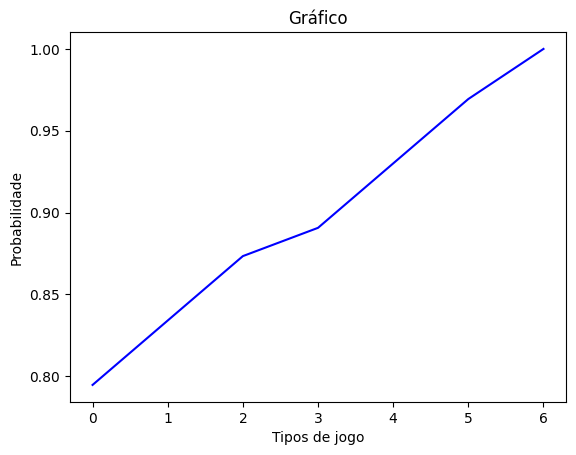

In [ ]:
grafico = fpVA.cumsum()
plt.plot(grafico, 'b-')
plt.xlabel('Tipos de jogo')
plt.ylabel('Probabilidade')
plt.title('Gráfico')

É provável que a variações do gráfico sejam causados por modos de jogo que apareçam menos, como no caso de replication e scalation (2 e 3), que aparecendo periodicamente no jogo.

##**Correlação**

Aqui será mostrado a relação de coluna em coluna. A ideia, é demonstrar o quão relacionados estão. Quanto mais perto de 1 mais relacionadas, por conta disso, não será testado colunas iguais que o resultado será exatamente 1.

**Name/Game Type**

In [ ]:
valorant[['Name', 'Game Type']].corr()

,Name,Game Type
Name,1.000000,0.000318
Game Type,0.000318,1.000000


**Name/Map**

In [ ]:
valorant[['Name', 'Map']].corr()

,Name,Map
Name,1.000000,0.001287
Map,0.001287,1.000000


**Name/Game Rank**

In [ ]:
valorant[['Name', 'Game Rank']].corr()

,Name,Game Rank
Name,1.000000,0.001142
Game Rank,0.001142,1.000000


Como pode-se observar, a coluna Name tem pouquissima relação com as demais colunas, isso ocorre ao fato dos nomes dos agentes estarem ordenados de acordo com o uso em jogo, sobrando para para as demasi colunas na mesma linha especificarem onde este agente aparece, e não por influência direta das colunas. Assim, por falta de uma padronização entre qualquer outra coluna, os números de correlação são baixos.

**Game Type/Map**

In [ ]:
valorant[['Game Type', 'Map']].corr()

,Game Type,Map
Game Type,1.000000,-0.073448
Map,-0.073448,1.000000


Como pode-se notar, a relação especifica entre o Game Type e o Map é negativa. O Coeficiente de Correlação varia entre -1 e 1. Assim sendo, a situação acima demonstra que é quase que inexistente a relação entre as duas colunas, o que se justifica pelo fato que, no dataset, nada além da organização proposta pelo criador do dataset influência entre estas duas colunas.

**Game Type/ Game Rank**

In [ ]:
valorant[['Game Rank', 'Game Type']].corr()

,Game Rank,Game Type
Game Rank,1.000000,0.524129
Game Type,0.524129,1.000000


Além das relações entre o Name e o Map, a relação entre Game Type e Game Rank são as mais próximas do dataset. É provável que isso ocorra pelo fato de que, a partir de certo tipo de jogo, o rank começa a se repertir e subir de forma padronizada, ou seja, a partir do modo de jogo do competitivo existe uma relação entre as duas colunas.

**Map/Game Rank**

In [ ]:
valorant[['Game Rank', 'Map']].corr()

,Game Rank,Map
Game Rank,1.000000,-0.060576
Map,-0.060576,1.000000


Enquanto a relação entre Name e Map resulta em um número maior que 0, as demais relações de Map são negativas. Isto deve ocorrer pelos fatos mencionados ao decorrer do dataset, certos agentes são considerados melhores em certos mapas do que outros, dando um certo padrão para certos mapas. No entanto, além deste tipo de relacionamento, o relacionamento com o Game Type e o relacionamento com o Game Rank são quase que inexistentes, como já fora explicado acima.

##**Distribuição Amostral**

Aqui será utilizado dos dados dos agentes para se testar o Teorema do Limite Central atráves das médias das distribuições amostrais de agentes escolhidos randomicamente.

Para esta análise, serão usados três niveis de quantidade amostral dos agentes. Cada teste será rodado em torno de 1000 vezes por cada nivel.

<function matplotlib.pyplot.show(close=None, block=None)>

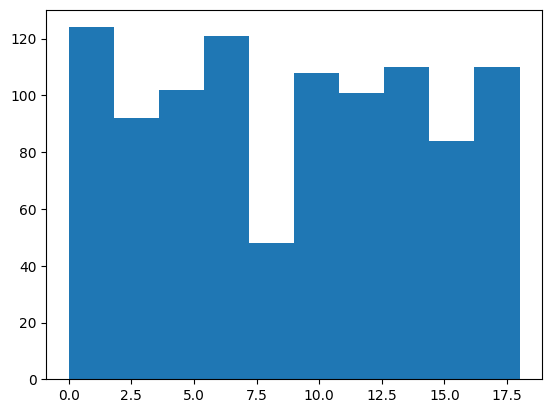

In [ ]:
seed(1)

mean1= [mean(randint(0, 19, 1)) for _ in range(1000)]

plt.hist(mean1)
plt.show

Neste nivel, está sendo usado apenas um agente escolhido rândomicamente para calcular a média, e, como pode-se notar, não há alguma semelhança com a normal, apenas um gráfico comum.

<function matplotlib.pyplot.show(close=None, block=None)>

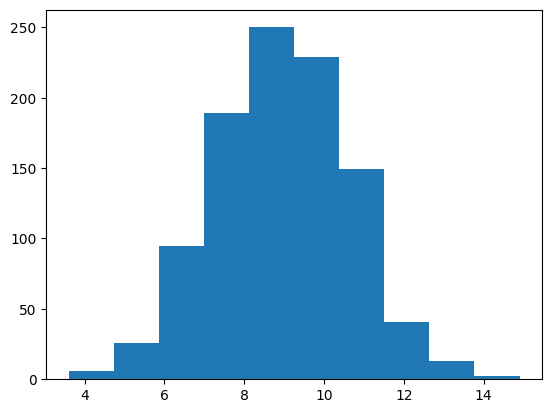

In [ ]:
mean2 = [mean(randint(0, 19, 10)) for _ in range(1000)]

plt.hist(mean2)
plt.show

Já neste nivel, está sendo usado 10 agentes rândomicos para calculo da média, e, assim, o gráfico se aproxima a uma normal.

<function matplotlib.pyplot.show(close=None, block=None)>

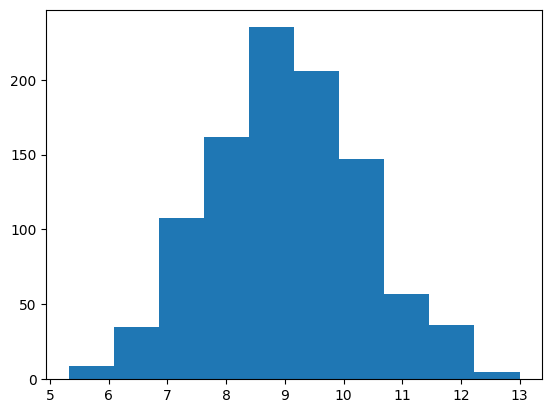

In [ ]:
mean3= [mean(randint(0, 19, 19)) for _ in range(1000)]

plt.hist(mean3)
plt.show

Neste nivel, está sendo usado todos os agentes, escolhidos de forma rândomica, para o cálculo da média, e, mesmo assim, há pouca mudança do nivel 2, mas já o possivél notar as propriedades do Teorema do Limite Central, visto que, a amostra não pode ultrapassar 19 agentes por isso ser seu total, esta é o mais próximo da normal que o dataset consegue chegar.

Com isso, fica demonstrado o Teorema do Limite Central, que diz quanto maior a amostra mais próxima da normal. Conforme os niveis foram subindo, o gráfico da amostra foi ficando cada vez mais próximo da normal, até chegar ao seu máximo e, de fato, parecer a normal, comprovando, assim, o Teorema.

##**Estatística Descritiva**

Aqui será utilizado diferentes gráficos para representar os agentes. A ideia é mostrar as principais caracteristicas de cada gráfico e como eles se comportariam como o dataset em questão.

##**Box Plot**

Aqui será usado BoxPlot para representar a relação entre o agente e o mapa, parecido com que ocorre com a Probabilidade Condicional.

In [ ]:
fig1 = px.box(valorant, x='Name', y='Map')
fig1.show()

Como pode se ver, o BoxPlot mostra simetria entre as duas variáveis. Na analise da Probabilidade Condicional, foi-se levado em conta a lógica por trás do jogo e de como os personagens são escolhidos dependendo do mapa. Porém, o BoxPlot pode trazer uma alternativa que foi apenas mencionada na análise, a organização dos mapas. Todos os mapas aparecem, diferente dos agentes, mas como um mesmo mapa se repete diversas vezes, dá espaço para determinadosa agentes se repetirem gerando o gráfico acima.

Diferente do que foi visto acima, um BoxPlot tem a vantagem de identificar a mediana, ou seja, onde os dados mais estão agrupados, além de, conseguir identifcar pontos dispersantes, porém, se esses pontos dispersantes forem relevantes o suficiente, podem inválidar o BoxPlot.

##**Histograma**

Aqui será utilizado o Histograma, para isso, se utilizará do rank, pois é uma medida em que a maioria é simetrica.

In [ ]:
fig2 = px.histogram(valorant, x = 'Game Rank', marginal= 'rug')
fig2.show()

Como dito acima a ideia era escolher uma medida simetrica, porém, especificamente o rank, há um dos resultados que discrepa extremamente dos outros (Unrated), que causa o que é visto no gráfico. Neste caso o Histograma acaba não sendo tão efetivo quanto realmente pode ser. O Histogram, é uma otima ferramentea para visualizar as quantidades da amostra e analisar fenomenos, como o Teorema do Limite Central como já foi mostrado. Porém, por contra, novamente, da natureza simetrica como o dataset foi criado e organizado, o Histograma não se torna efetivo por conta da maioria dos valores estarem na mesma quantidade, dificultando sua analie atráves dele.

##**Scatter Plot**

Aqui será utilizado dos comparátivos entre Game Type e Game Rank para explicar a ideia do Scatter Plot.

In [ ]:
fig  = px.scatter(valorant, x = 'Name', y = 'Game Rank', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Agentes X Rank em jogo')
fig.update_xaxes(title = 'Agentes')
fig.update_yaxes(title = 'Ranks')
fig.show()

Como pode se notar, o Scatter Plot não é muito efetivo para o dataset em questão. Isso ocorre devido a organização do dataset, padronizando a saída do gráfico de uma forma ineficiênte em comparação ao padrão do Scatter Plot. Este gráfico é usado para identificar a correlação e covariância entre duas variáveis e normalmente desenhase uma "linha" indicando a relação das duas, algo que não é visto aqui.

##**Heatmap**

Aqui será mostrado o mapa de calor de todo o dataset, a ideia é mostrar como de fato funciona o Heatmap.

<Axes: >

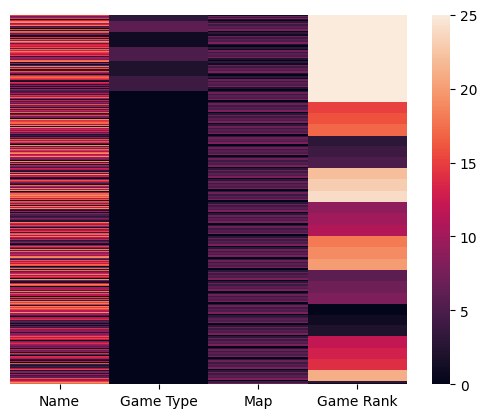

In [ ]:
sns.heatmap(valorant, yticklabels=False)

Como pode-se notar, é possivél visualizar todas as variáveis e, principalmente, como elas se comportam dentro do dataset. É possivél notar também, o que já foi mencionado diversas vezes, a organização simétrica do dataset, principalmente nas colunas Name e Map. Além disso, é possivél notar a discrepancia que há entre os dados da coluna Game Type e Game Rank.

Um mapa de calor serve para acompanhar o comportamento de certas variáveis, ou, neste caso, de todo um dataset, porém, é mais efetivo e utilizado em análise de uma única variável. A ideia é conseguir observar de uma amplitudade geral como os estados da variável se comporta, mas também é possivel ver qual estado mais se repete, podendo ser utilizado junto ao Boxplot, para se ter uma noção maior do que está acontecendo.

##**Intervalo de Confiança**

Aqui será escolhido a variável dos agentes, pois é a mais próxima de se ter uma variação, para econtrar um intervalo de confiança entre 90% e 95%.

In [ ]:
medAgent = mean(valorant["Name"])
dpAgent = np.std(valorant["Name"])

n = len(valorant["Name"]);

min1 = medAgent - 1.6449*(dpAgent/(n) ** (1/2))
max1 = medAgent + 1.6449*(dpAgent/(n) ** (1/2))

print("O intervalo de confiança para 90% é: " + str(round(min1,2)) + " <= x <= " + str(round(max1,2)))

O intervalo de confiança para 90% é: 9.37 <= x <= 9.65


In [ ]:
min2 = medAgent - 1.9600*(dpAgent/(n) ** (1/2))
max2 = medAgent + 1.9600*(dpAgent/(n) ** (1/2))

print("O intervalo de confiança para 95% é: " + str(round(min2,2)) + " <= x <= " + str(round(max2,2)))

O intervalo de confiança para 95% é: 9.34 <= x <= 9.67
